In [ ]:
%%capture
%pip install datasets

In [ ]:
from datasets import Dataset
from datasets import load_dataset

In [ ]:
from google.colab import userdata
from huggingface_hub import login

HF_TOKEN = userdata.get('HF_TOKEN')
login(token = HF_TOKEN)

In [ ]:
DATASET_NAME = 'AdityaMayukhSom/MixSub-Hallucinated-Highlight-Features'
ds = load_dataset(DATASET_NAME)

df_train = ds['train'].to_pandas()
df_test = ds['test'].to_pandas()

README.md:   0%|          | 0.00/640 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/334k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1600 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# X_train = df_train.iloc[:, 0:-1]
# Y_train = df_train.iloc[:, -1]

# X_test = df_test.iloc[:, 0:-1]
# Y_test = df_test.iloc[:, -1]

df = pd.concat([df_train, df_test], axis = 0)
X, Y = df.iloc[:, 0:-1], df.iloc[:, -1]

training_cols = ['MTP' , 'AVGTP', 'MDVTP' , 'MMDVP']
X = X[training_cols]
# X_train_features, X_test_features = X_train[training_cols], X_test[training_cols]

ob = StandardScaler()
X = ob.fit_transform(X)
X = pd.DataFrame(X, columns = training_cols)

Y = Y.astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.7, random_state = 69
)

In [ ]:
X.describe()

,MTP,AVGTP,MDVTP,MMDVP
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-3.907985e-17,-1.243450e-17,2.566392e-15,1.403322e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.551652e-01,-6.917033e-01,-2.811361e+01,-2.106882e+00
25%,-1.551652e-01,-4.397351e-01,1.002300e-01,-7.141970e-01
50%,-1.551652e-01,-2.434001e-01,2.290603e-01,-1.451736e-01
75%,-1.551652e-01,1.275677e-01,2.720038e-01,5.656680e-01
max,1.924049e+01,1.922254e+01,2.720038e-01,5.316576e+00


In [ ]:
X

,MTP,AVGTP,MDVTP,MMDVP
0,3.077443,1.477520,0.272004,-0.642413
1,-0.155165,-0.522413,0.272004,1.534759
2,-0.155165,-0.457361,0.272004,0.347688
3,-0.155165,-0.237032,0.186117,0.002773
4,-0.155165,-0.489658,0.272004,3.082503
...,...,...,...,...
1995,-0.155165,-0.144421,0.229060,-0.016487
1996,-0.155165,-0.241002,0.229060,-0.349147
1997,-0.155165,-0.233837,0.229060,-0.437564
1998,-0.155165,-0.170514,0.272004,0.337183


In [ ]:
Y_train

,IsHallucinated
1557,0
153,0
95,1
951,1
1174,0
...,...
26,1
619,1
393,0
1227,0


In [ ]:
print(Y_train.value_counts())
print(Y_test.value_counts())

IsHallucinated
0    710
1    690
Name: count, dtype: int64
IsHallucinated
1    310
0    290
Name: count, dtype: int64


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

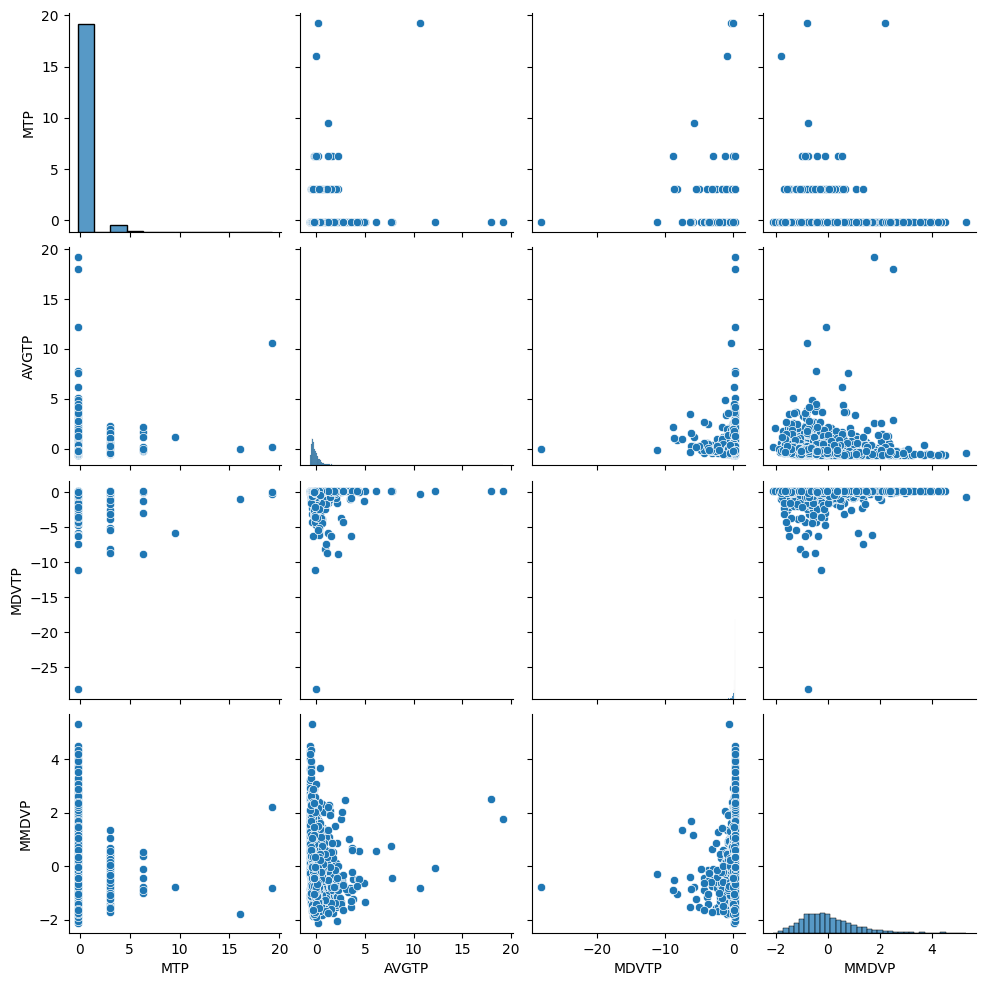

In [ ]:
sns.pairplot(X)
plt.show()

## Training Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lr_clf = LogisticRegression(verbose=1)
lr_clf.fit(X_test, Y_test)

Y_pred_train = lr_clf.predict(X_train)
Y_pred_test = lr_clf.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

print("\n\n")

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

Train Accuracy: 62.43%
Test Accuracy: 63.50%



              precision    recall  f1-score   support

           0       0.67      0.50      0.58       710
           1       0.59      0.75      0.66       690

    accuracy                           0.62      1400
   macro avg       0.63      0.63      0.62      1400
weighted avg       0.63      0.62      0.62      1400

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       290
           1       0.62      0.76      0.68       310

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.64      0.64      0.63       600



## Training Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, Y_train)

# Bernoulli Naive Bayes
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, Y_train)

# Multinomial Naive Bayes
# mnb_clf = MultinomialNB()
# mnb_clf.fit(X_train, Y_train)

# Change x_clf.predict according to which NB we want to test on.
Y_pred_train = bnb_clf.predict(X_train)
Y_pred_test = bnb_clf.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

print("\n\n")

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

Train Accuracy: 62.57%
Test Accuracy: 62.50%



              precision    recall  f1-score   support

           0       0.69      0.48      0.56       710
           1       0.59      0.78      0.67       690

    accuracy                           0.63      1400
   macro avg       0.64      0.63      0.62      1400
weighted avg       0.64      0.63      0.62      1400

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       290
           1       0.61      0.77      0.68       310

    accuracy                           0.62       600
   macro avg       0.63      0.62      0.61       600
weighted avg       0.63      0.62      0.62       600



## Training KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, Y_train)

Y_pred_train = knn_clf.predict(X_train)
Y_pred_test = knn_clf.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

print("\n\n")

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

Train Accuracy: 71.36%
Test Accuracy: 59.83%



              precision    recall  f1-score   support

           0       0.72      0.70      0.71       710
           1       0.70      0.72      0.71       690

    accuracy                           0.71      1400
   macro avg       0.71      0.71      0.71      1400
weighted avg       0.71      0.71      0.71      1400

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       290
           1       0.61      0.62      0.62       310

    accuracy                           0.60       600
   macro avg       0.60      0.60      0.60       600
weighted avg       0.60      0.60      0.60       600



## Training Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=8)
rf_clf.fit(X_train, Y_train)

Y_pred_train = rf_clf.predict(X_train)
Y_pred_test = rf_clf.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

print("\n\n")

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

Train Accuracy: 80.21%
Test Accuracy: 63.33%



              precision    recall  f1-score   support

           0       0.82      0.78      0.80       710
           1       0.78      0.83      0.80       690

    accuracy                           0.80      1400
   macro avg       0.80      0.80      0.80      1400
weighted avg       0.80      0.80      0.80      1400

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       290
           1       0.64      0.65      0.65       310

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



In [ ]:
import xgboost as xgb

learning_rate_range = np.arange(0.01, 1, 0.03)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, Y_train)
    train_XG.append(xgb_classifier.score(X_train, Y_train))
    test_XG.append(xgb_classifier.score(X_test, Y_test))

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

print("\n\n")

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

Train Accuracy: 80.21%
Test Accuracy: 63.33%



              precision    recall  f1-score   support

           0       0.82      0.78      0.80       710
           1       0.78      0.83      0.80       690

    accuracy                           0.80      1400
   macro avg       0.80      0.80      0.80      1400
weighted avg       0.80      0.80      0.80      1400

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       290
           1       0.64      0.65      0.65       310

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



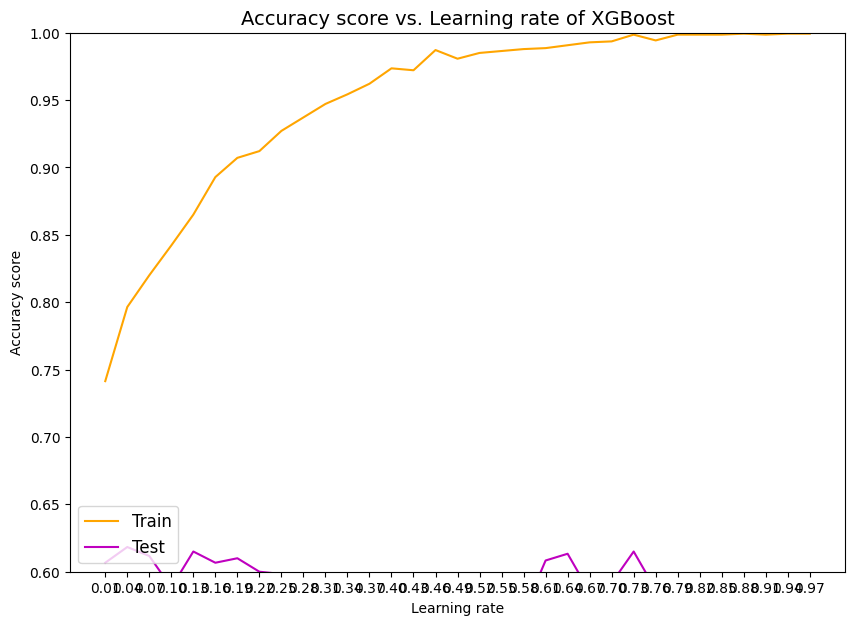

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

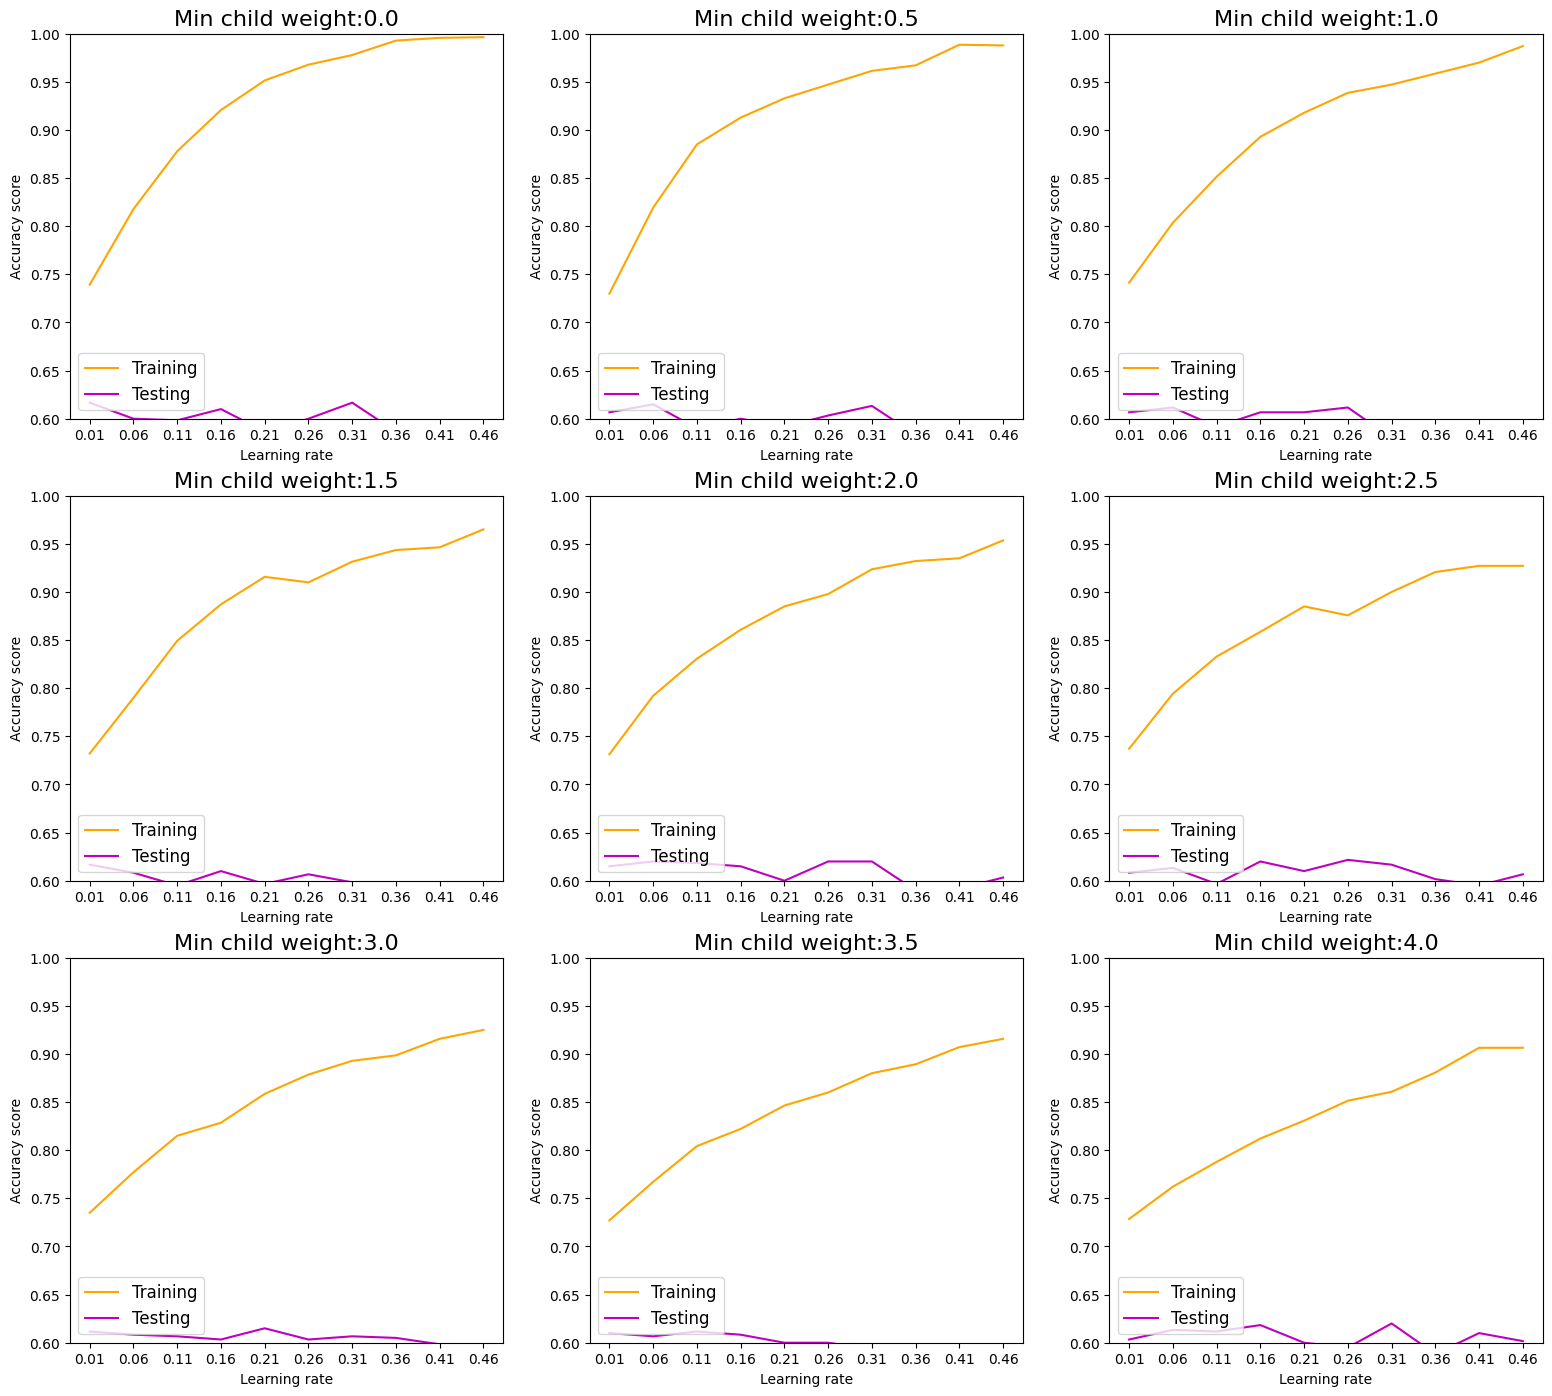

In [ ]:
# new learning rate range
learning_rate_range = np.arange(0.01, 0.5, 0.05)
fig = plt.figure(figsize=(19, 17))
idx = 1
# grid search for min_child_weight
for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(X_train, Y_train)
        train.append(xgb_classifier.score(X_train, Y_train))
        test.append(xgb_classifier.score(X_test, Y_test))
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()

In [ ]:
log_odds = lr_clf.coef_[0]
odds = np.exp(lr_clf.coef_[0])
lr_features_log = {k: v for k, v in zip(X_train.keys(), log_odds)}
lr_features_no_log = {k: v for k, v in zip(X_train.keys(), odds)}

print("log", lr_features_log)
print("no_log", lr_features_no_log)

log {'MTP': -0.032594820420849824, 'AVGTP': -0.18765400544280164, 'MDVTP': 0.960270133745186, 'MMDVP': 0.31262580225825015}
no_log {'MTP': 0.9679306658867859, 'AVGTP': 0.828901453014777, 'MDVTP': 2.612402076072025, 'MMDVP': 1.3670099032898424}


## Training SVC

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(
    kernel='rbf',
    degree = 7
)

svc_clf.fit(X_train, Y_train)

Y_pred_train = svc_clf.predict(X_train)
Y_pred_test = svc_clf.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print(f"Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

print("\n\n")

print(classification_report(Y_train, Y_pred_train))
print(classification_report(Y_test, Y_pred_test))

Train Accuracy: 64.57%
Test Accuracy: 62.50%



              precision    recall  f1-score   support

           0       0.68      0.56      0.62       710
           1       0.62      0.73      0.67       690

    accuracy                           0.65      1400
   macro avg       0.65      0.65      0.64      1400
weighted avg       0.65      0.65      0.64      1400

              precision    recall  f1-score   support

           0       0.63      0.53      0.58       290
           1       0.62      0.72      0.66       310

    accuracy                           0.62       600
   macro avg       0.63      0.62      0.62       600
weighted avg       0.63      0.63      0.62       600



## Training SNN

In [ ]:
import torch
import torch.nn as nn

class SimpleDenseNet(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim=1, dropout_prob=0.4):
        super(SimpleDenseNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.tanh = nn.Tanh()
        # self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        x = self.tanh(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device = torch.device(device)

In [ ]:
denseModel = SimpleDenseNet(
    input_dim=np.array([True, True, True, True]).sum(), hidden_dim=1024
).to(device)

## Code declaring and computing all the metrics to measure

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)


def compute_metrics(model, input_tensor, true_labels):
    with torch.no_grad():
        outputs = model(input_tensor)
        predicted_probs = torch.sigmoid(outputs).cpu().numpy()
        predicted = (outputs > 0.5).float().cpu().numpy()

        true_labels = true_labels.cpu().numpy()

        acc = accuracy_score(true_labels, predicted)
        precision = precision_score(true_labels, predicted)
        recall = recall_score(true_labels, predicted)
        f1 = f1_score(true_labels, predicted)

        precision_negative = precision_score(true_labels, predicted, pos_label=0)
        recall_negative = recall_score(true_labels, predicted, pos_label=0)
        f1_negative = f1_score(true_labels, predicted, pos_label=0)

        tn, fp, fn, tp = confusion_matrix(true_labels, predicted).ravel()
        roc_auc = roc_auc_score(true_labels, predicted_probs)

        P, R, thre = precision_recall_curve(true_labels, predicted, pos_label=1)
        pr_auc = auc(R, P)

        roc_auc_negative = roc_auc_score(
            true_labels, 1 - predicted_probs
        )  # If predicted_probs is the probability of the positive class
        P_neg, R_neg, _ = precision_recall_curve(true_labels, predicted, pos_label=0)
        pr_auc_negative = auc(R_neg, P_neg)

        return {
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "TP": tp,
            "TN": tn,
            "FP": fp,
            "FN": fn,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Precision-Negative": precision_negative,
            "Recall-Negative": recall_negative,
            "F1-Negative": f1_negative,
            "ROC AUC-Negative": roc_auc_negative,
            "PR AUC-Negative": pr_auc_negative,
        }

## Code for training the Dense Model and getting the result of all metrics corresponding to the Testing Set.

In [ ]:
import numpy as np

def compute_accuracy(model, input_tensor, true_labels):
    with torch.no_grad():
        outputs = model(input_tensor)
        predicted = (outputs > 0.5).float()
        correct = (predicted == true_labels).float().sum()
        accuracy = correct / len(true_labels)
        return accuracy.item()


X_train_tensor = torch.Tensor(X_train.to_numpy(dtype=np.float64)).to(device)
Y_train_tensor = torch.Tensor(Y_train.to_numpy(dtype=np.float64)).view(-1, 1).to(device)

print(X_train_tensor.shape, Y_train_tensor.shape)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(denseModel.parameters(), lr=0.001)

bestValAcc = 0
# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    denseModel.train()
    optimizer.zero_grad()
    outputs = denseModel(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    train_accuracy = compute_accuracy(denseModel, X_train_tensor, Y_train_tensor)

    # Uncomment this if you want to see how the accuracy of testing improves during the training process.
    ##Compute testing accuracy
    # X_val_tensor = torch.tensor(X_val_features, dtype=torch.float32).to(device)
    # Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32).view(-1, 1).to(device)

    # val_accuracy = compute_accuracy(denseModel, X_val_tensor, Y_val_tensor)

    # if bestValAcc < val_accuracy:
    #     bestValAcc = val_accuracy
    #     print(f'Saving model with best validation accuracy ...')
    #     torch.save(denseModel.state_dict(), 'llama-' + task + '-best-model')

    if (epoch + 1) % 10 == 0:
        print(
            f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}"
        )  # , "Validation Accuracy": {val_accuracy:.4f}')

torch.Size([1400, 4]) torch.Size([1400, 1])
Epoch [10/2000], Loss: 0.6935, Training Accuracy: 0.6100
Epoch [20/2000], Loss: 0.6459, Training Accuracy: 0.6400
Epoch [30/2000], Loss: 0.6318, Training Accuracy: 0.6407
Epoch [40/2000], Loss: 0.6294, Training Accuracy: 0.6393
Epoch [50/2000], Loss: 0.6272, Training Accuracy: 0.6400
Epoch [60/2000], Loss: 0.6261, Training Accuracy: 0.6457
Epoch [70/2000], Loss: 0.6251, Training Accuracy: 0.6429
Epoch [80/2000], Loss: 0.6239, Training Accuracy: 0.6436
Epoch [90/2000], Loss: 0.6226, Training Accuracy: 0.6450
Epoch [100/2000], Loss: 0.6209, Training Accuracy: 0.6493
Epoch [110/2000], Loss: 0.6188, Training Accuracy: 0.6500
Epoch [120/2000], Loss: 0.6186, Training Accuracy: 0.6486
Epoch [130/2000], Loss: 0.6214, Training Accuracy: 0.6543
Epoch [140/2000], Loss: 0.6148, Training Accuracy: 0.6564
Epoch [150/2000], Loss: 0.6132, Training Accuracy: 0.6536
Epoch [160/2000], Loss: 0.6110, Training Accuracy: 0.6636
Epoch [170/2000], Loss: 0.6090, Train

## Uncomment next cell if you want to load a particular model you already trained.

In [ ]:
# loaded_model = SimpleDenseNet(input_dim=len(list(features_to_extract.keys())), hidden_dim=512).to(device)
# loaded_model.load_state_dict(torch.load('llama-' + task + '-best-model'))

# # Set the model to evaluation mode"
# loaded_model.eval()

## Compute the metrics using the model on the Test Set.

In [ ]:
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
# Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1).to(device)

X_test_tensor = torch.Tensor(X_test.to_numpy(dtype=np.float64)).to(device)
Y_test_tensor = torch.Tensor(Y_test.to_numpy(dtype=np.float64)).view(-1, 1).to(device)


# test_metrics = compute_metrics(denseModel, X_train_tensor, Y_train_tensor)
test_metrics = compute_metrics(denseModel, X_test_tensor, Y_test_tensor)

print(
    f"Testing - Accuracy: {test_metrics['Accuracy']:.4f}, Precision: {test_metrics['Precision']:.4f}, Recall: {test_metrics['Recall']:.4f}, F1: {test_metrics['F1']:.4f}, ROC AUC: {test_metrics['ROC AUC']:.4f}, PR AUC: {test_metrics['PR AUC']:.4f}"
)
print(
    f"Testing - Negative: {test_metrics['Accuracy']:.4f}, Precision-Negative: {test_metrics['Precision-Negative']:.4f}, Recall-Negative: {test_metrics['Recall-Negative']:.4f}, F1-Negative: {test_metrics['F1-Negative']:.4f}, ROC AUC-Negative: {test_metrics['ROC AUC-Negative']:.4f}, PR AUC-Negative: {test_metrics['PR AUC-Negative']:.4f}"
)

Testing - Accuracy: 0.5983, Precision: 0.6131, Recall: 0.6032, F1: 0.6081, ROC AUC: 0.6169, PR AUC: 0.7107
Testing - Negative: 0.5983, Precision-Negative: 0.5831, Recall-Negative: 0.5931, F1-Negative: 0.5880, ROC AUC-Negative: 0.3831, PR AUC-Negative: 0.5402


In [ ]:
torch.save(denseModel)

## Save the results on a CSV if you want.

In [ ]:
model_dataframe = pd.DataFrame(
    columns=[
        "features",
        "model_name",
        "feature_to_extract",
        "method",
        "accuracy",
        "precision",
        "recall",
        "roc auc",
        "pr auc",
        "negative",
        "precision-negative",
        "recall-negative",
        "negative f1",
        "lr_accuracy",
        "lr_features_log",
        "lr_features_no_log",
    ]
)

In [ ]:
d = {
    "features": features_to_extract,
    "model_name": str(model.getName()),
    "feature_to_extract": feature_to_extract,
    "method": "TEST",
    "accuracy": test_metrics["Accuracy"],
    "precision": test_metrics["Precision"],
    "recall": test_metrics["Recall"],
    "f1": test_metrics["F1"],
    "pr auc": test_metrics["PR AUC"],
    "precision-negative": test_metrics["Precision-Negative"],
    "recall-negative": test_metrics["Recall-Negative"],
    "negative-f1": test_metrics["F1-Negative"],
    "lr_accuracy": lr_accuracy,
    "lr_features_log": lr_features_log,
    "lr_features_no_log": lr_features_no_log,
}

NameError: name 'features_to_extract' is not defined

In [ ]:
# model_dataframe.loc[len(model_dataframe.index)] = d
# model_dataframe.head()
# csv_name = f"{model.getSanitizedName()}_{task}_{includeKnowledge=}_{includeConditioned=}_{'_'.join([f'{k}={v}' for k, v in features_to_extract.items()])}.csv"
# model_dataframe.to_csv(output_path / csv_name, index=False)